# **Titanic Survival Prediction**




---


# Group Number: 14
# EG/2021/4661: Maduranaganee J.A.S.M.
# EG/2021/4773: Samaranayaka D.A.

---



---
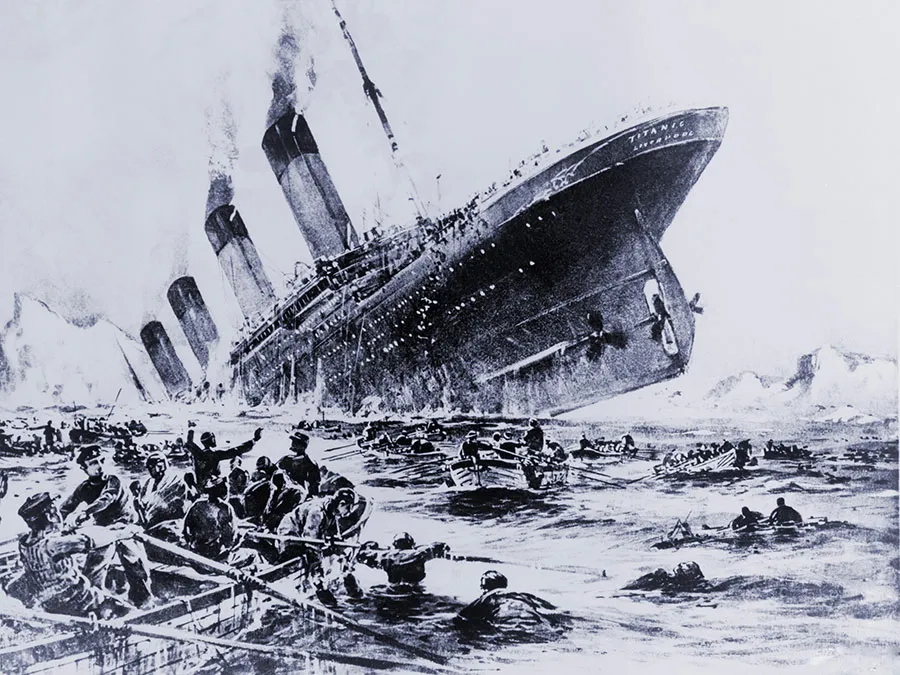



# **Introduction**

---


In this project, we are going to utilize the Titanic Survival Dataset from Kaggle, which consists of various features that might influence the survival likelihood of passengers during the Titanic disaster.

Data Link: https://www.kaggle.com/c/titanic/data

# **Project Description**
**Literature Survey**

---



The Titanic disaster of 1912 has been widely studied to understand survival factors. Key influences include age, gender, and socio-economic status, with women, children, and First-Class passengers having higher survival rates. Machine learning techniques such as logistic regression, decision trees, and ensemble methods have been applied to the Titanic dataset, achieving strong predictive results. This project leverages these approaches to analyze survival patterns and improve model accuracy.



**Dataset Description**

---



The Titanic dataset from Kaggle contains 891 records with key features:

Survived: Binary target variable (0 = No, 1 = Yes).

Pclass: Passenger class (1st, 2nd, 3rd).

Sex: Gender (Male, Female).

Age: Passenger age (with missing values).

SibSp and Parch: Family aboard.

Fare: Ticket fare (includes outliers).

Embarked: Port of embarkation (C, Q, S)



**Objectives**

---



Preprocess data: handle missing values, outliers, and engineer features.

Develop predictive models: compare algorithms like logistic regression and decision trees.

Analyze results: evaluate model performance and identify key survival facto

**Load the Necessary Libraries**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #data visualization libraries
import seaborn as sns  #data visualization libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

**Data Loading**

In [35]:
#load the data from csv file to pandas dataFrame
titanic_data = pd.read_csv('/content/train.csv')

**Data Collection & Processing**

In [36]:
#printing the first 5 rows of the dataframe
titanic_data.head() #titanic_data is the name of our data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
#number of rows and columns
titanic_data.shape

(891, 12)

In [38]:
#getting some information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
# check number of missing values in each column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Handling the missing values**

In [40]:
#drop the cabin column from the dataset
titanic_data=titanic_data.drop(columns='Cabin',axis=1)  #when droping row, axis=0; column,axis=1

In [41]:
#replacing the missing values in age column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

<ipython-input-41-7a4c737d8de2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


In [42]:
#finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [43]:
print(titanic_data['Embarked'].mode()[0])

S


In [44]:
#Replacing missing values in "Embarked" column with mode value
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [45]:
#number of missing values in each column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling Outliers

identifying outliers

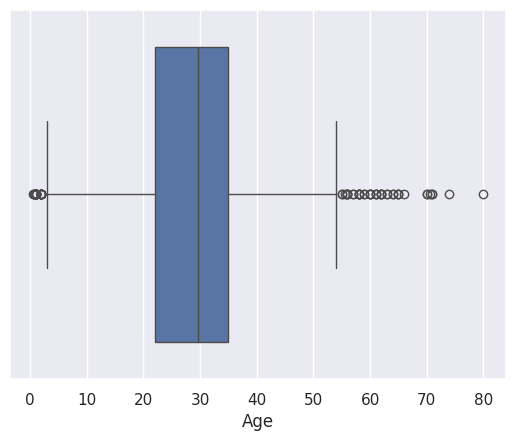

In [46]:
# Box plot for visualizing outliers in a feature (e.g., 'Age')
sns.boxplot(x=titanic_data['Age'])
plt.show()

Handling outliers

In [47]:
# Remove outliers using the IQR method
Q1 = titanic_data['Age'].quantile(0.25)
Q3 = titanic_data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on IQR
titanic_data_cleaned = titanic_data[(titanic_data['Age'] >= (Q1 - 1.5 * IQR)) & (titanic_data['Age'] <= (Q3 + 1.5 * IQR))]


Feature Scaling

In [48]:
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

Data Analysis

In [49]:
#Getting some statistical meassures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,2.232906e-16,0.523008,0.381594,3.987333e-18
std,257.353842,0.486592,0.836071,1.000562e+00,1.102743,0.806057,1.000562e+00
min,1.000000,0.000000,1.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01
50%,446.000000,0.000000,3.000000,0.000000e+00,0.000000,0.000000,-3.573909e-01
75%,668.500000,1.000000,3.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,3.870872e+00,8.000000,6.000000,9.667167e+00


In [50]:
#finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


Data Visualization

In [51]:
sns.set() #give some theme for our plots

<Axes: xlabel='Survived', ylabel='count'>

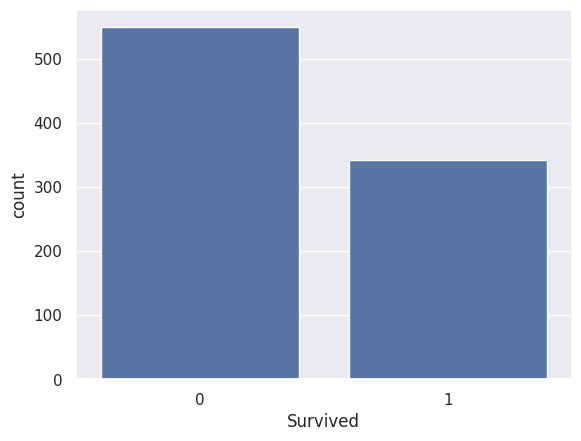

In [52]:
#making a count plot for "survived" column
sns.countplot(x='Survived', data=titanic_data)

In [53]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

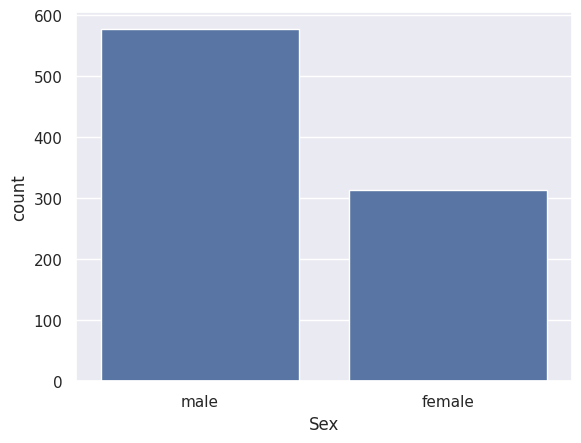

In [54]:
#making a count plot for "sex" column
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

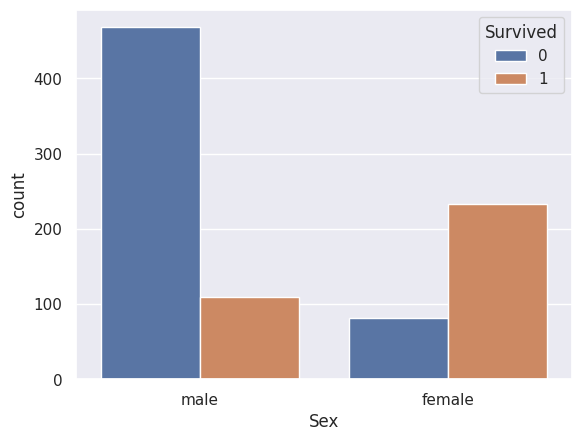

In [55]:
#number of survivors gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

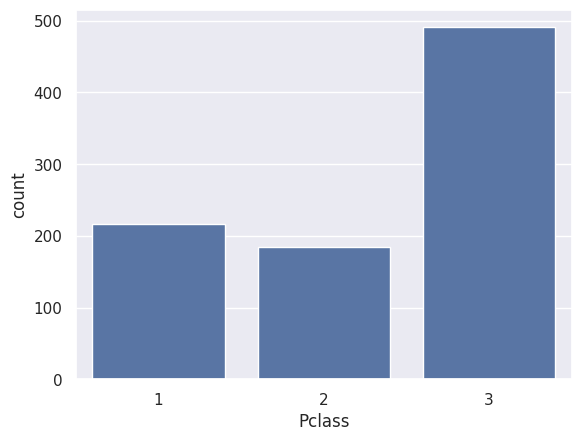

In [56]:
#making a count plot for "pclass" column
sns.countplot(x='Pclass', data=titanic_data)  #Pclass=ticket class

<Axes: xlabel='Pclass', ylabel='count'>

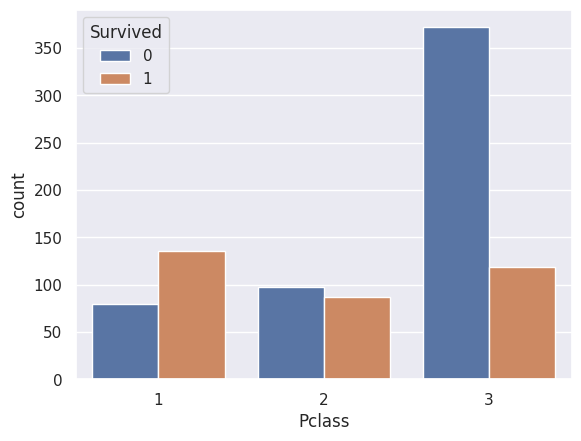

In [57]:
#number of survivors ticket class wise
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

Encoding the categorical columns

In [58]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [59]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [60]:
#converting categorical columns
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
titanic_data = titanic_data.infer_objects(copy=False)

<ipython-input-60-804f6fe8f460>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [61]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.592481,1,0,A/5 21171,-0.502445,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.638789,1,0,PC 17599,0.786845,1
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.284663,0,0,STON/O2. 3101282,-0.488854,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.407926,1,0,113803,0.420730,0
4,5,0,3,"Allen, Mr. William Henry",0,0.407926,0,0,373450,-0.486337,0


Seperating features & target

In [62]:
x=titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'],axis=1)
y=titanic_data['Survived']

In [63]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0 -0.592481      1      0 -0.502445         0
1         1    1  0.638789      1      0  0.786845         1
2         3    1 -0.284663      0      0 -0.488854         0
3         1    1  0.407926      1      0  0.420730         0
4         3    0  0.407926      0      0 -0.486337         0
..      ...  ...       ...    ...    ...       ...       ...
886       2    0 -0.207709      0      0 -0.386671         0
887       1    1 -0.823344      0      0 -0.044381         0
888       3    1  0.000000      1      2 -0.176263         0
889       1    0 -0.284663      0      0 -0.044381         1
890       3    0  0.177063      0      0 -0.492378         2

[891 rows x 7 columns]


In [64]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into training data & test data

In [65]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [66]:
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


Model Training

Logistic Regression

In [67]:
model= LogisticRegression()

In [68]:
#training the logistic regression model with the training data
model.fit(x_train, y_train)

LogisticRegression()

Accuracy score

In [69]:
#accuracy on training data
x_train_prediction = model.predict(x_train)


In [70]:
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [71]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy score of training data : ' ,training_data_accuracy)

Accuracy score of training data :  0.8089887640449438


In [72]:
#accuracy on test data
x_test_prediction = model.predict(x_test)

In [73]:
print(x_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [74]:
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy score of test data : ' ,test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


Model Training with Decision tree

In [75]:
tree_model = DecisionTreeClassifier()

In [76]:
# Train the Decision Tree model with the training data
tree_model.fit(x_train, y_train)


DecisionTreeClassifier()

In [77]:
# Define the hyperparameter grid for the Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Options for the splitting criterion
    'max_depth': [None, 10, 20, 30],   # Tree depth options
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples per leaf
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,    # 5-fold cross-validation
    n_jobs=-1 # Use all available cores
)

# Train with hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best model and its parameters
best_tree_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the training data
x_train_prediction = best_tree_model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data with best model: ', training_data_accuracy)

# Evaluate the model with the test data
x_test_prediction = best_tree_model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy score of test data with best model: ', test_data_accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy score of training data with best model:  0.8876404494382022
Accuracy score of test data with best model:  0.7597765363128491


Accuracy score

In [78]:
#accuracy on training data
x_train_prediction = tree_model.predict(x_train)


In [79]:
print(x_train_prediction)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [80]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy score of training data : ' ,training_data_accuracy)

Accuracy score of training data :  0.9859550561797753


In [81]:
#accuracy on test data
x_test_prediction = tree_model.predict(x_test)

In [82]:
print(x_test_prediction)

[0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [83]:
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy score of test data : ' ,test_data_accuracy)

Accuracy score of test data :  0.7877094972067039


**Model Evaluation**

train and predict models

In [84]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
log_train_pred = model.predict(x_train)
log_test_pred = model.predict(x_test)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
tree_train_pred = tree_model.predict(x_train)
tree_test_pred = tree_model.predict(x_test)




Compute and Print Accuracy

In [85]:
# Accuracy
log_train_accuracy = accuracy_score(y_train, log_train_pred)
log_test_accuracy = accuracy_score(y_test, log_test_pred)
tree_train_accuracy = accuracy_score(y_train, tree_train_pred)
tree_test_accuracy = accuracy_score(y_test, tree_test_pred)

print("Logistic Regression:")
print(f"Training Accuracy: {log_train_accuracy:.2f}")
print(f"Test Accuracy: {log_test_accuracy:.2f}")
print("\nDecision Tree:")
print(f"Training Accuracy: {tree_train_accuracy:.2f}")
print(f"Test Accuracy: {tree_test_accuracy:.2f}")


Logistic Regression:
Training Accuracy: 0.81
Test Accuracy: 0.78

Decision Tree:
Training Accuracy: 0.99
Test Accuracy: 0.79


Generate Classification Reports

In [86]:
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, log_test_pred))
print("\nDecision Tree - Classification Report:")
print(classification_report(y_test, tree_test_pred))


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179


Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.77      0.75      0.76        79

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Plot Confusion Matrices

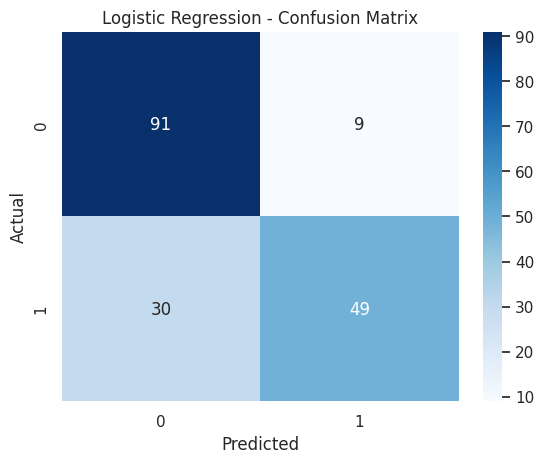

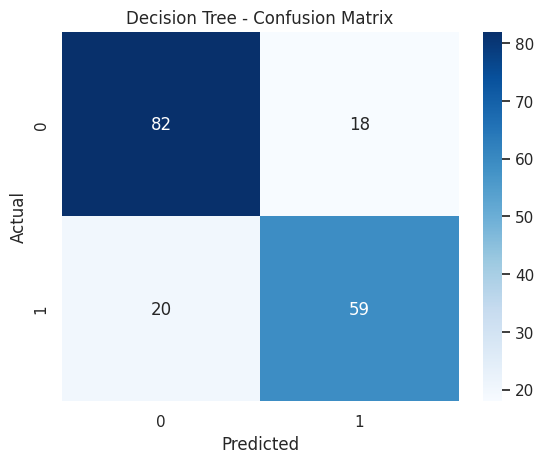

In [87]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, log_test_pred, "Logistic Regression - Confusion Matrix")
plot_confusion_matrix(y_test, tree_test_pred, "Decision Tree - Confusion Matrix")

ROC curve

In [88]:
# Logistic Regression - Probabilities
log_train_prob = model.predict_proba(x_train)[:, 1]  # Probability for positive class (1)
log_test_prob = model.predict_proba(x_test)[:, 1]

# Decision Tree - Probabilities
tree_train_prob = tree_model.predict_proba(x_train)[:, 1]  # Probability for positive class (1)
tree_test_prob = tree_model.predict_proba(x_test)[:, 1]

In [89]:
# Calculate ROC curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_test_prob)
roc_auc_log = auc(fpr_log, tpr_log)

# Calculate ROC curve for Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_test_prob)
roc_auc_tree = auc(fpr_tree, tpr_tree)

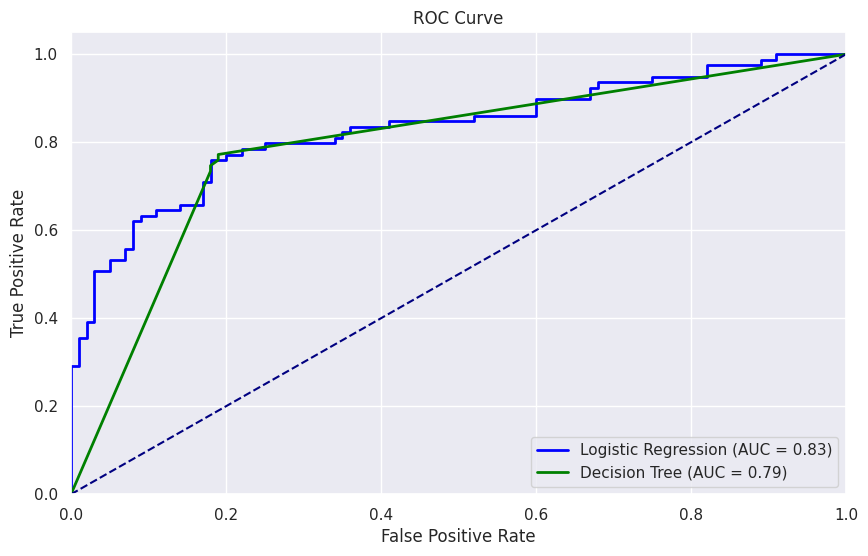

In [90]:

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Conclusion**

---



Logistic Regression is the better choice overall for Titanic survival prediction because it generalizes better, has a higher AUC, and provides a balanced performance. The Decision Tree might perform better in detecting survivors (higher recall for class 1), but it risks overfitting.

#  Feedback

---



Based on the feedback provided during the evaluation, we have addressed the issue of overfitting observed in our Decision Tree model by incorporating hyperparameter tuning.

# **References**

---



1. https://www.kaggle.com/
2. https://en.wikipedia.org/wiki/Passengers_of_the_Titanic